# BIKE SHARING ASSINGMENT

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### The Company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands.

##### Business Goal: 

* Build a model to find the variables which are significant for the demand of shared bikes with the available           independent variables.
* This model will be used by the management to understand and manipulate the business strategy to meet the demand       levels and meet the customer's expectation.

# Step 1: Reading and Understanding the Data

Let us first import the required libraries and read the dataset

In [84]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Now we will read the data the data from the csv file

In [86]:
bikeSharing = pd.read_csv('/Users/Shivam/Downloads/day.csv')
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [87]:
# Check the shape of the dataframe
bikeSharing.shape

(730, 16)

So, the bikeSharing dataframe has 730 rows and 16 columns.
Let's inspect some other aspects as well.

In [88]:
# Info about the columns
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Here, we see that except the 'dteday' column which is object, rest other columns are either integer or float.

In [89]:
# Checking the numerical aspects of the data
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [90]:
# Cheching for the null values
bikeSharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Here, we can see that none of the columns have any null values.

# Step 2: Data Cleaning

Now, we will check the whole data and drop those unwanted columns which are not useful for our analysis.
* We see that 'instant' column is just an index for the rows so we can drop it.
* We will also drop 'dteday' column because it just indicates the date which can be inferred from year and month         column.
* We will also drop 'casual' and 'registered' column as these two are just breakup of 'cnt' column.

In [91]:
# Dropping the unwanted columns

bikeSharing.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [92]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Some of the columns needs mapping to get a better idea and clarity of the data. So we will map some columns and convert them to categorical column.

In [93]:
#  Mapping the season column

bikeSharing.season = bikeSharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [94]:
# Mapping the month column

bikeSharing.mnth = bikeSharing.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [95]:
# Mapping the weekday column

bikeSharing.weekday = bikeSharing.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat' })

In [96]:
# Mapping the weathersit column

bikeSharing.weathersit = bikeSharing.weathersit.map({1:'Clear', 2:'Mist', 3:'Light_snow', 4:'Heavy_rain'})

In [97]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [98]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 3: Data Visualization

## EDA:

## Let us visualise the numerical column first

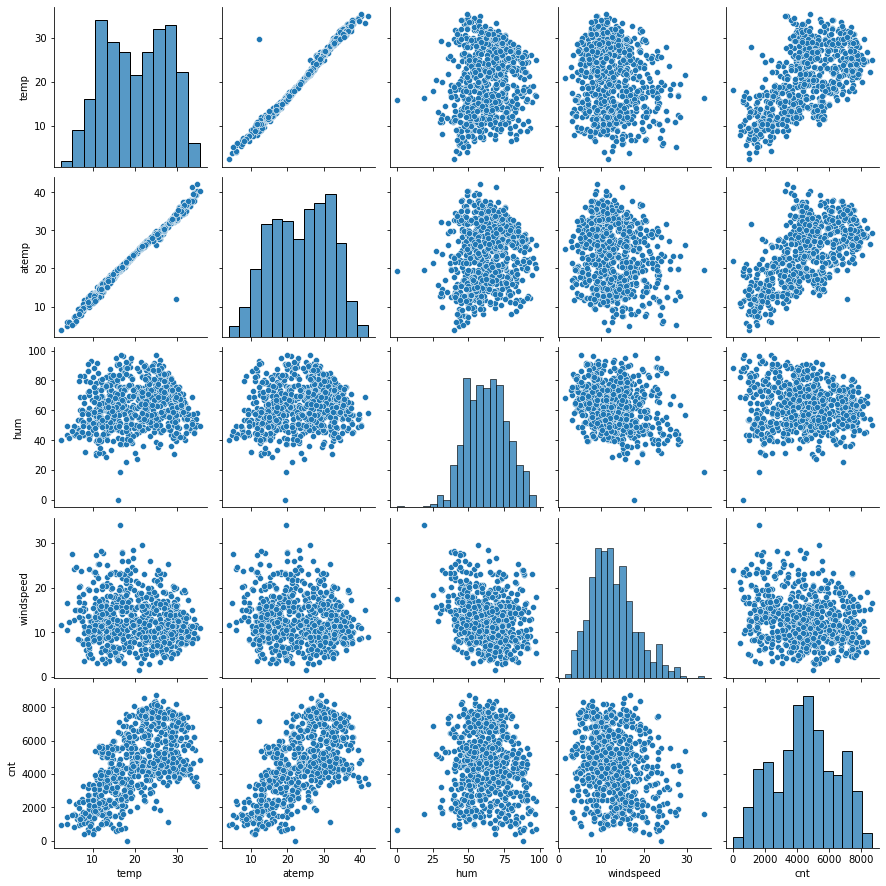

In [99]:
sns.pairplot(data = bikeSharing, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

##### It looks like temp and atemp are highly correlated with cnt. Temp and atemp have a strong linear relationship.

Lets make a pairplot of all the numerical variables.

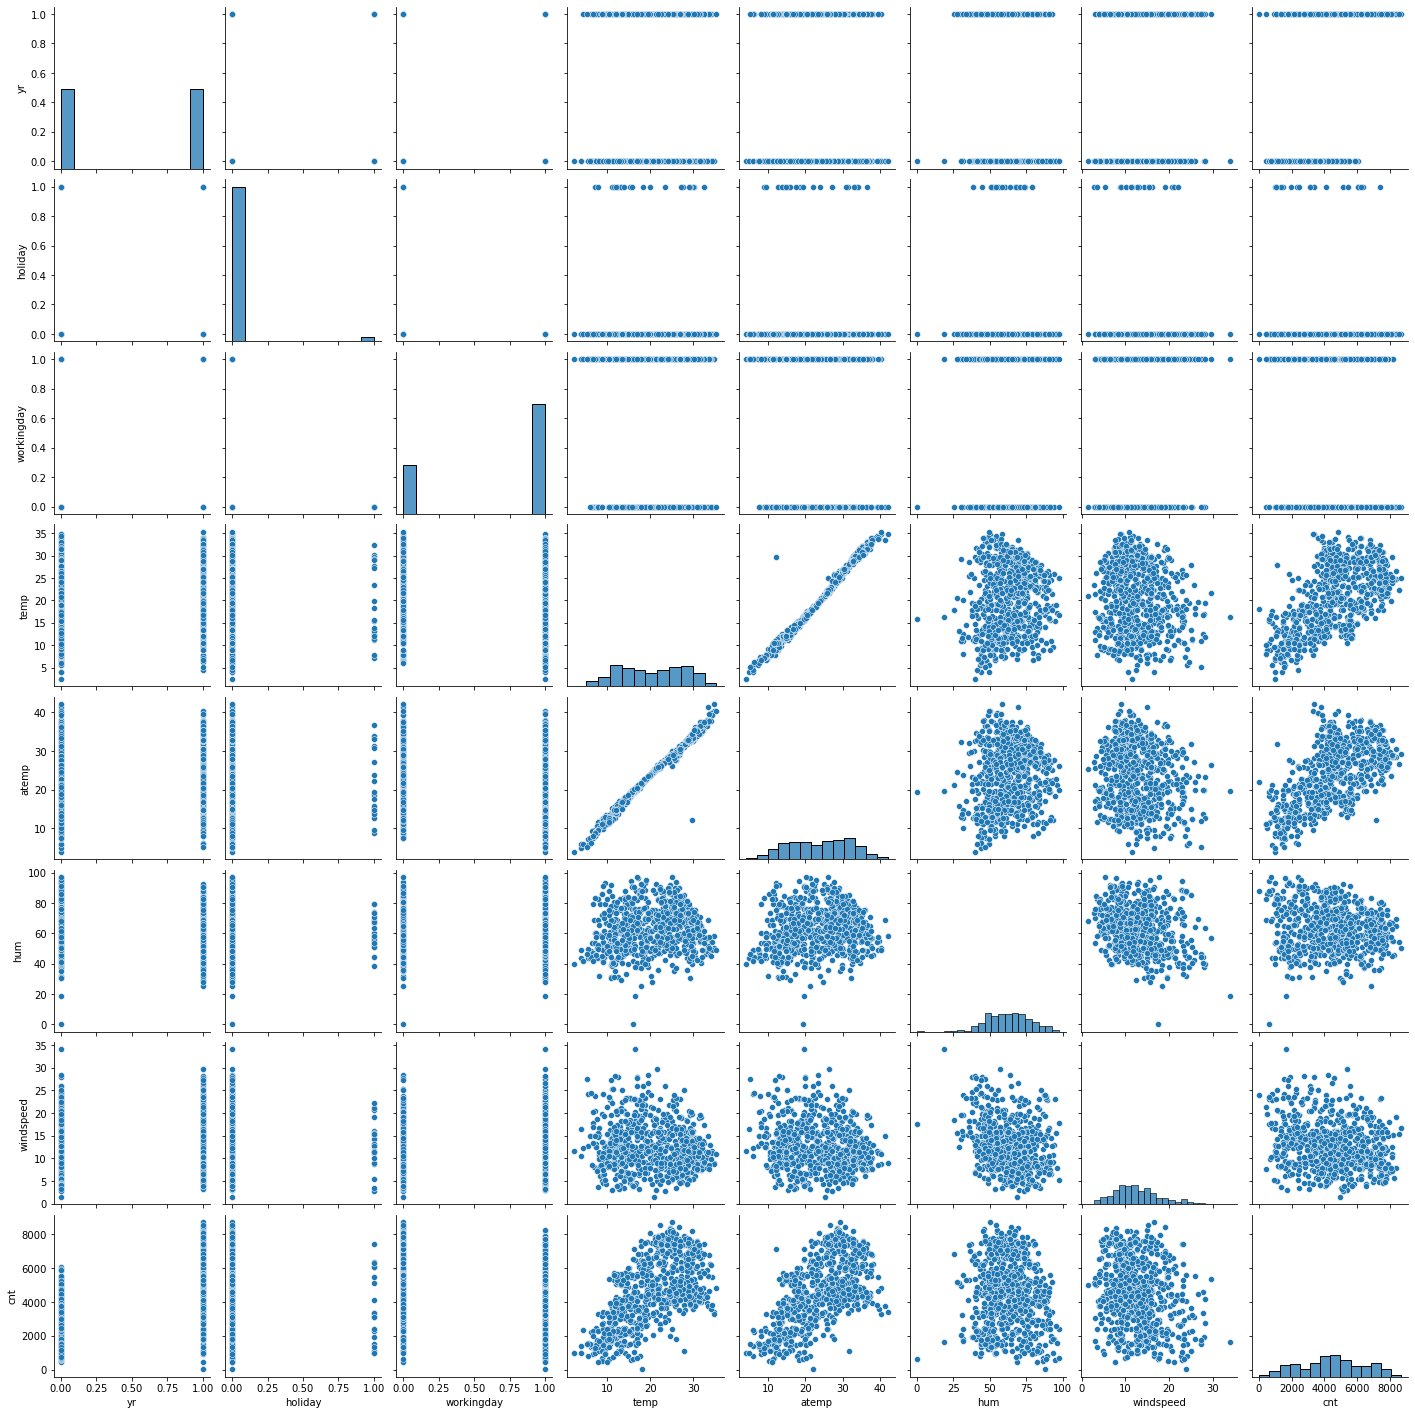

In [100]:
sns.pairplot(bikeSharing)
plt.show()

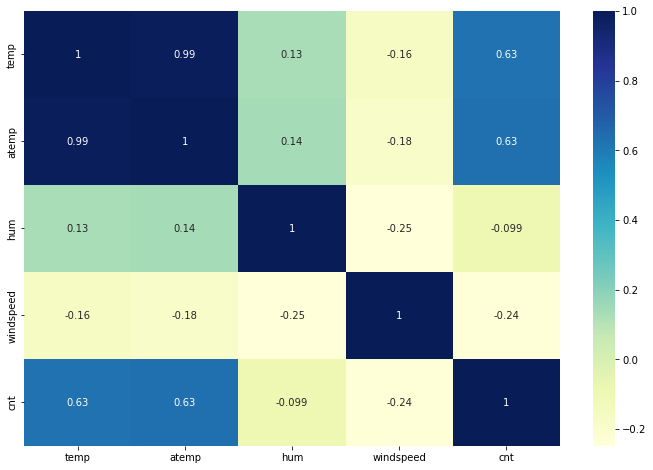

In [101]:
# Let's check the correlation between continuous variables

plt.figure(figsize = (12,8))
sns.heatmap(bikeSharing[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

##### Here we can see that temp and atemp have a correlation of 0.99 which means they are highly correlated.
So both of them can not be used in the model beacuse of multicollinearity. We will decide later which column to drop.

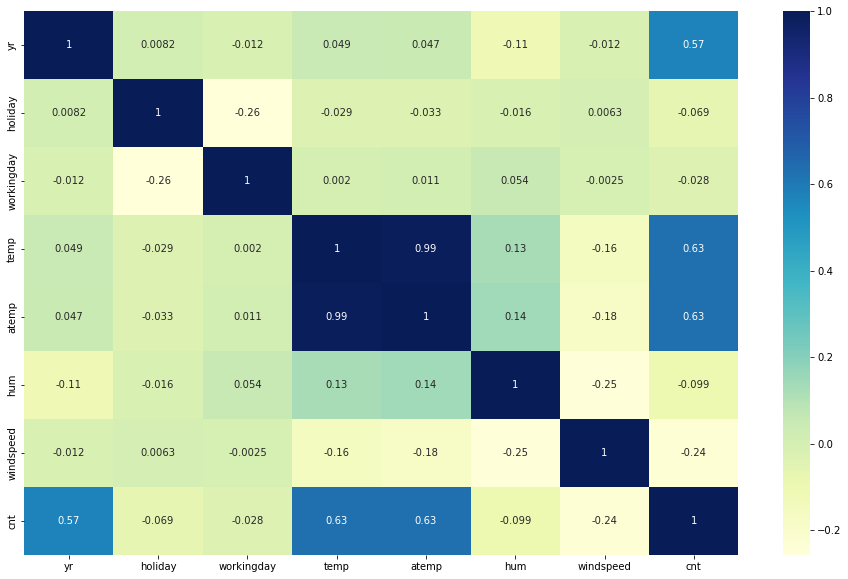

In [102]:
# Checking correlation between all  numerical variables

plt.figure(figsize = (16, 10))
sns.heatmap(bikeSharing.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

##  Now let's visualise the categorical columns 

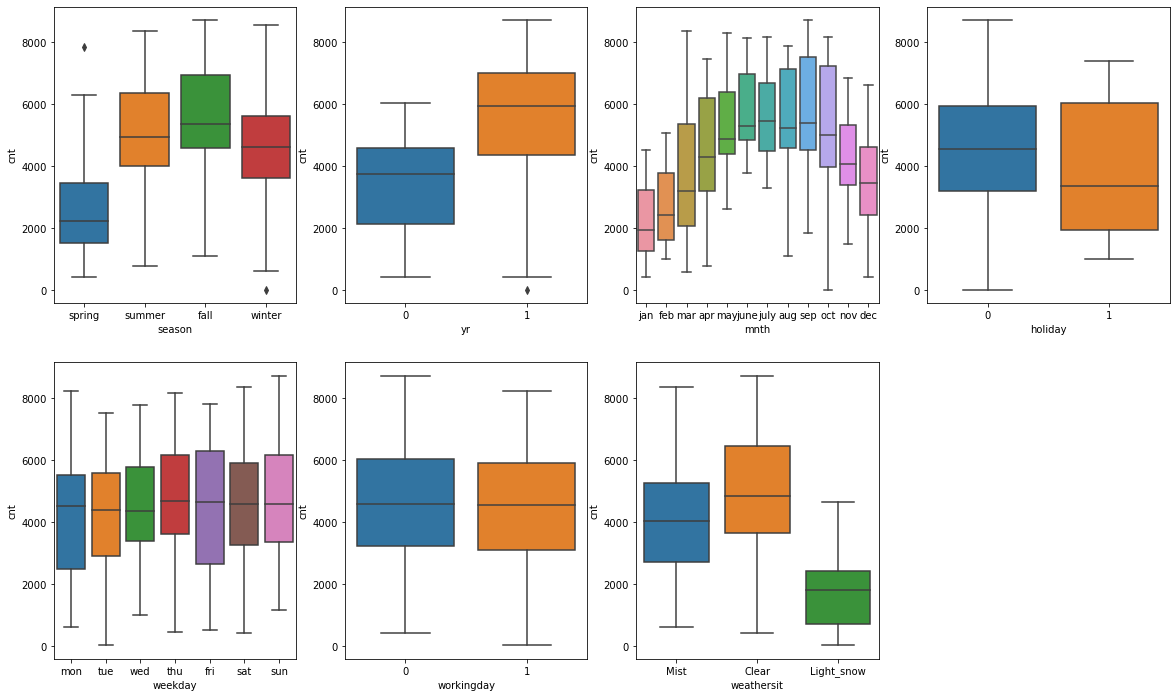

In [103]:
# Let's make boxplot for categorical variables

plt.figure(figsize = (20,12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)
plt.show()


### Inference: 

* Season 3 i.e. fall has the highest demand
* Demand in the year 2019 has increased
* Demand is increasing till the month of july then it falls
* Demand has decreased on holidays
* Weekday does not give a clear inference
* Demand is almost same wheather its workingday or not
* Clear weather attracts more demand

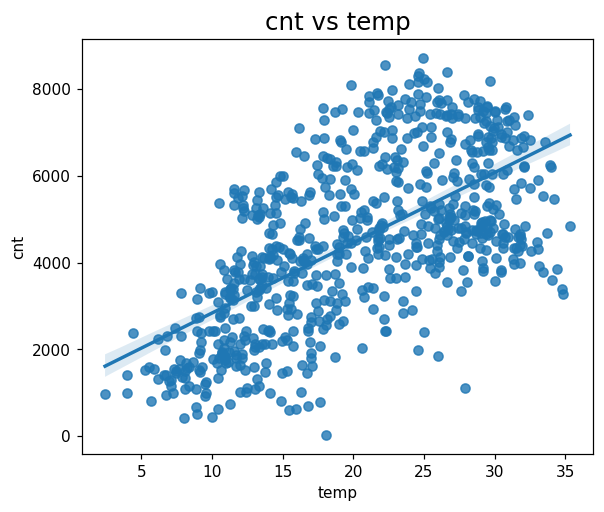

In [104]:
plt.figure(figsize=(6,5), dpi = 110)
plt.title('cnt vs temp', fontsize = 16)
sns.regplot(data = bikeSharing, y = 'cnt', x = 'temp')
plt.show()

We see that:

* the demand is positively correlated with temp
* Hence the demand is linearly increasing with temp.

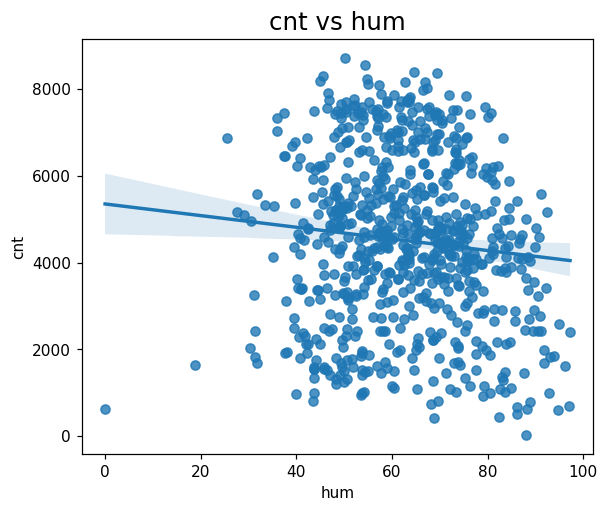

In [105]:
plt.figure(figsize=(6,5), dpi = 110)
plt.title('cnt vs hum', fontsize = 16)
sns.regplot(data = bikeSharing, y = 'cnt', x = 'hum')
plt.show()

We see a more scattered plot. But it can inferred that cnt is decreasing with increase in hum

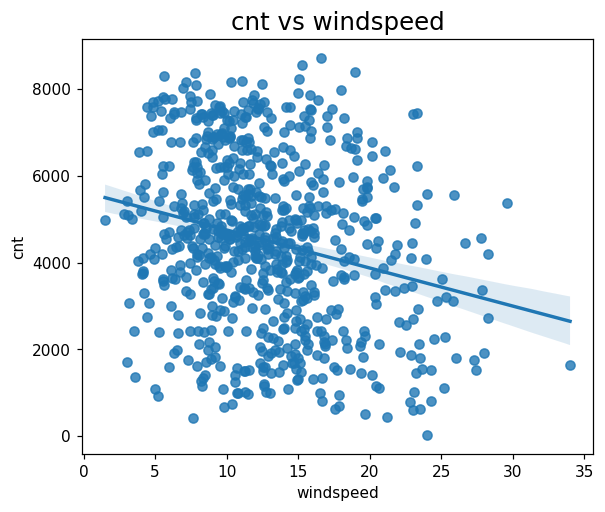

In [106]:
plt.figure(figsize=(6,5), dpi = 110)
plt.title('cnt vs windspeed', fontsize = 16)
sns.regplot(data = bikeSharing, y = 'cnt', x = 'windspeed')
plt.show()

Again we see a highly scattered plot, but cnt is decreasing with increase in windspeed

In [107]:
bikeSharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 4: Data Preparation

### DUMMY VARIABLE:
#### Let's create Dummy Variables for season, mnth, weekday and weathersit columns.

In [108]:
# Dummy variable creation

season_df = pd.get_dummies(bikeSharing.season, drop_first = True)
month_df = pd.get_dummies(bikeSharing.mnth, drop_first = True)
weekday_df = pd.get_dummies(bikeSharing.weekday, drop_first = True)
weathersit_df = pd.get_dummies(bikeSharing.weathersit, drop_first = True)

In [109]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [110]:
# Merge the original dataset with the dummy varible dataset
bikeSharing = pd.concat([bikeSharing, season_df, month_df, weekday_df, weathersit_df], axis = 1)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [111]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  aug         730 non-null    uint8  
 16  dec         730 non-null    uint8  
 17  feb         730 non-null    uint8  
 18  jan         730 non-null    uint8  
 19  july        730 non-null    u

### Now we have to drop unnecessary columns because we have created dummy variables for them.

In [112]:
# Dropping unnecessary columns

bikeSharing.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Shape of new dataframe

bikeSharing.shape

(730, 30)

In [114]:
# Column info

bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  july        730 non-null    uint8  
 16  june        730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

# Step 5: Splitting the Data into Training and Testing Sets

#### Now we will perform Train-Test Split

In [115]:
# train-test split

np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features

It is very important to rescale the variables, so that they have a comparable scale. Because, if we don't have comparable scales then, some of the coefficients obtained by fitting the regression model might be very large or very small as compared to other coefficients. So, it is advised to use standardization or normalisation so that the units of the coefficients obtained are all on the same scale.
Two common ways of rescaling are:
* Min-MaxScaling or normalisation: Between 0 and 1
* Standardization(mean-0, sigma-1)

Here we are using Min-Max Scaling

#### Using MinMaxScaler we will Rescale the features

In [116]:
scaler = MinMaxScaler()

In [117]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [118]:
# Apply scaler() to all the columns except 'yes-no' and dummy variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [119]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [120]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


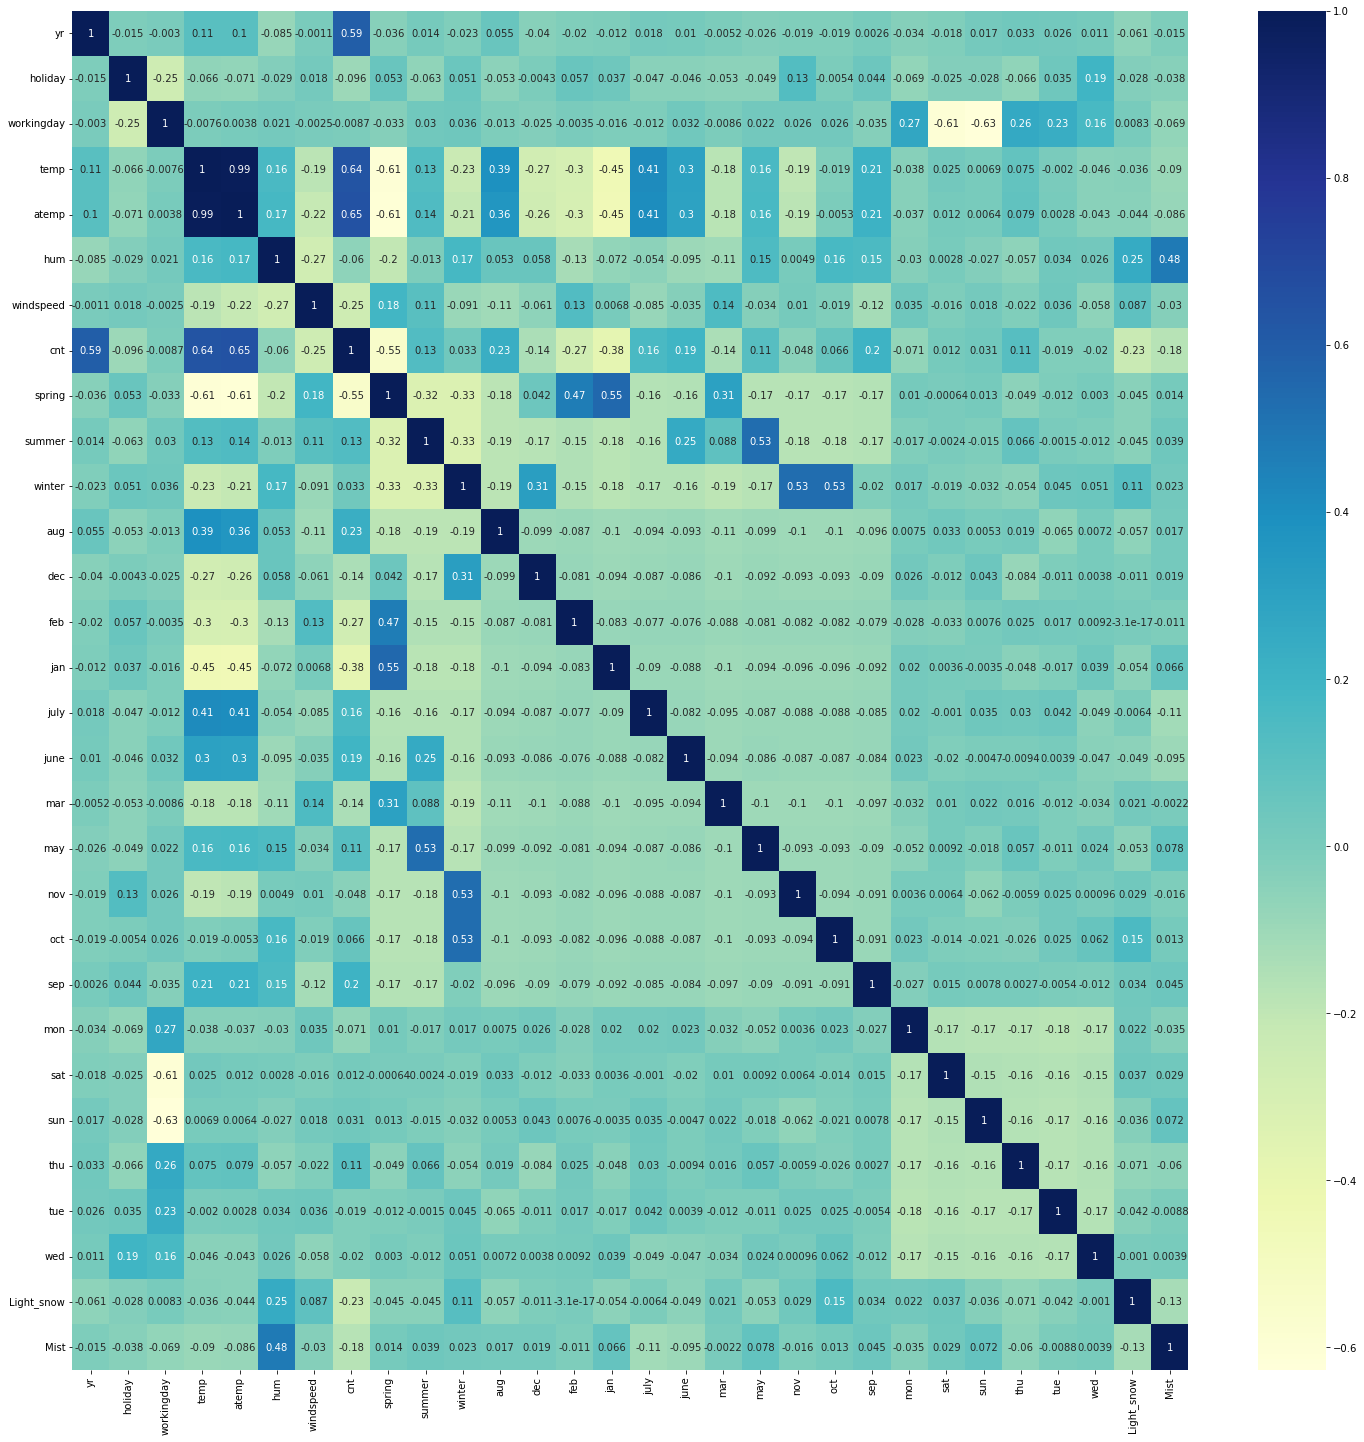

In [121]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

As we have noticed
* 'cnt' is correlated to 'yr' and 'temp'.
* 'Mist' and 'hum' are correlated.
* 'summer' is correlated with 'may'.
* 'winter' is correlated with 'oct' and 'nov'.
* 'spring' is correlated with 'jan' and 'feb'.

#### Let's see a pairplot for temp vs cnt

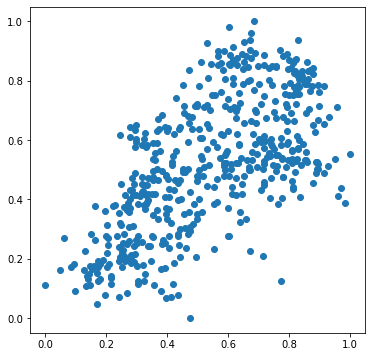

In [122]:
plt.figure(figsize = [6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Here, we see a positive correlation between temp and cnt 

### Dividing into X and Y sets for Model Building 

In [123]:
y_train = df_train.pop('cnt')
X_train = df_train

#### RFE 
Recursive Feature Elimination

In [124]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [125]:
# List of Variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light_snow', True, 1),
 ('Mist', True, 1)]

In [126]:
# Selected Columns
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'winter', 'jan', 'sep', 'sat', 'sun', 'Light_snow', 'Mist'],
      dtype='object')


In [127]:
# Rejected Columns
X_train.columns[~rfe.support_]

Index(['spring', 'summer', 'aug', 'dec', 'feb', 'july', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

### Buildng a model using statsmodel, for the detailed statistics

In [128]:
# Creating dataframe with RFE selected variables

X_train_rfe = X_train[col]

#### Calculating VIF of Variables

In [129]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [130]:
calculateVIF(X_train_rfe)

,features,VIF
4,atemp,356.18
3,temp,345.79
5,hum,35.58
2,workingday,30.63
11,sun,6.39
10,sat,6.08
6,windspeed,5.38
13,Mist,2.36
0,yr,2.07
1,holiday,1.76


We see that some of the variables have very high VIF value.

# Step 6: Building the Model

In [131]:
# Building 1st model

X_train_lm1 = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train, X_train_lm1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     161.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.93e-174
Time:                        14:45:17   Log-Likelihood:                 476.78
No. Observations:                 510   AIC:                            -923.6
Df Residuals:                     495   BIC:                            -860.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3011      0.082      3.678      0.0

#### As 'atemp' has avery high VIF value, we can drop it

In [132]:
# Dropping atemp

X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

In [133]:
# Checking the VIF

calculateVIF(X_train_new)

,features,VIF
4,hum,35.36
2,workingday,30.44
3,temp,11.27
10,sun,6.36
9,sat,6.08
5,windspeed,5.23
12,Mist,2.36
0,yr,2.07
1,holiday,1.76
6,winter,1.74


Still some columns have very high VIF values, Let's build another model.

In [134]:
# Building 2nd model
X_train_lm2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.98e-175
Time:                        14:45:18   Log-Likelihood:                 476.45
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     496   BIC:                            -865.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.082      3.703      0.0

Drop 'hum' column as it has very high VIF value

In [135]:
# Dropping hum
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [136]:
# Checking VIF

calculateVIF(X_train_new)

,features,VIF
2,workingday,14.94
3,temp,10.27
4,windspeed,4.97
9,sun,3.69
8,sat,3.52
0,yr,2.06
5,winter,1.67
11,Mist,1.57
6,jan,1.54
1,holiday,1.35


Still 'workingday' and 'temp' has high VIF value. Let's build another model

In [137]:
# Building 3rd model

X_train_lm3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train, X_train_lm3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          6.41e-174
Time:                        14:45:18   Log-Likelihood:                 470.14
No. Observations:                 510   AIC:                            -914.3
Df Residuals:                     497   BIC:                            -859.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2123      0.079      2.703      0.0

Drop 'workingday' column as it has high VIF value

In [138]:
# Dropping workingday and calculating VIF

X_train_new = X_train_new.drop(['workingday'], axis = 1)
calculateVIF(X_train_new)

,features,VIF
2,temp,3.69
3,windspeed,3.17
0,yr,2.04
10,Mist,1.52
4,winter,1.29
8,sun,1.19
5,jan,1.18
7,sat,1.18
6,sep,1.16
9,Light_snow,1.08


Now VIF of all the columns is below 5, which is good. But, we will check the columns having high p-value and drop them.

Let's build another model

In [139]:
# Building 4th model

X_train_lm4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train, X_train_lm4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.86e-175
Time:                        14:45:18   Log-Likelihood:                 470.04
No. Observations:                 510   AIC:                            -916.1
Df Residuals:                     498   BIC:                            -865.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1789      0.020      8.804      0.0

We can drop 'sat' variable because it has high p-value

In [140]:
# Dropping 'sat' variable and checking VIF value

X_train_new = X_train_new.drop(['sat'], axis = 1)
calculateVIF(X_train_new)

,features,VIF
2,temp,3.61
3,windspeed,3.16
0,yr,2.04
9,Mist,1.51
4,winter,1.29
5,jan,1.17
6,sep,1.16
7,sun,1.16
8,Light_snow,1.08
1,holiday,1.04


In [141]:
# Building 5th model

X_train_lm5 = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train, X_train_lm5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          7.08e-176
Time:                        14:45:18   Log-Likelihood:                 469.22
No. Observations:                 510   AIC:                            -916.4
Df Residuals:                     499   BIC:                            -869.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1810      0.020      8.933      0.0

We can also drop 'sun' variable because it has high p-value

In [142]:
# Dropping 'sun' variable and checking VIF values

X_train_new = X_train_new.drop(['sun'], axis = 1)
calculateVIF(X_train_new)

,features,VIF
2,temp,3.57
3,windspeed,3.15
0,yr,2.03
8,Mist,1.50
4,winter,1.29
5,jan,1.17
6,sep,1.16
7,Light_snow,1.08
1,holiday,1.04


Let's build another model and check the values

In [143]:
# Building 6th model

X_train_lm6 = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train, X_train_lm6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     244.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.18e-176
Time:                        14:45:18   Log-Likelihood:                 468.22
No. Observations:                 510   AIC:                            -916.4
Df Residuals:                     500   BIC:                            -874.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1830      0.020      9.045      0.0

In [144]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'winter', 'jan', 'sep',
       'Light_snow', 'Mist'],
      dtype='object')

In [145]:
# VIF of the new model

calculateVIF(X_train_new)

,features,VIF
2,temp,3.57
3,windspeed,3.15
0,yr,2.03
8,Mist,1.50
4,winter,1.29
5,jan,1.17
6,sep,1.16
7,Light_snow,1.08
1,holiday,1.04


In [146]:
lm_6.params

const         0.183025
yr            0.234223
holiday      -0.103713
temp          0.512596
windspeed    -0.150950
winter        0.088396
jan          -0.079696
sep           0.074901
Light_snow   -0.286895
Mist         -0.073591
dtype: float64

### The 6th model i.e lm_6 is good. We can consider this model for further analysis because, the p-value of all predictor variables are significant, the VIF is also less than 5 for all variables and there is very less multicollinearity between them 

### F-Statistics is 244.1 and prob(F-Statistics) is 1.18e-176, almost equal to zero.
### We can say that overall the model is Significant

# Step 7: Residual Analysis of the train data

One of the major assumptions of linear regression is that the error terms are also normally distributed.
Let's plot the histogram of error terms and see what it looks like.

In [147]:
X_train_lm6

,const,yr,holiday,temp,windspeed,winter,jan,sep,Light_snow,Mist
653,1.0,1,0,0.509887,0.300794,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,1
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,1,0,0,0,1


In [148]:
y_train_pred = lm_6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

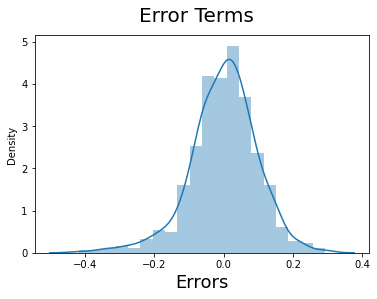

In [149]:
# Plotting the histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

##### Here we can see that Error terms are distributed normally, with mean = 0

### MultiCollinearity 

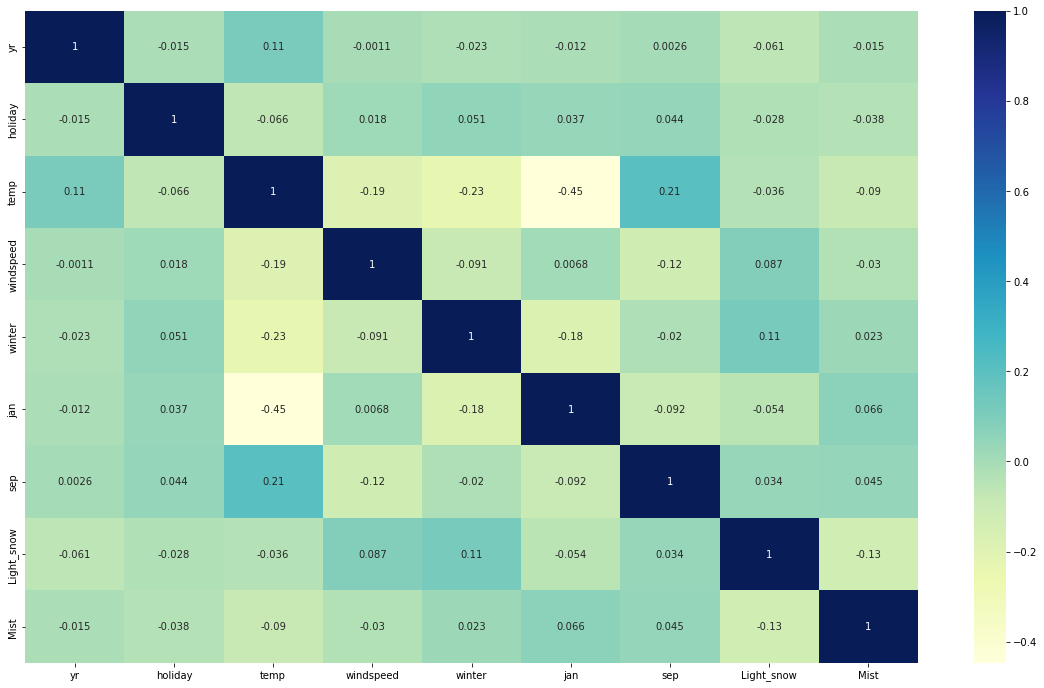

In [150]:
# Let's check for multicolinearity

plt.figure(figsize = (20,12))
sns.heatmap(X_train_new.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

There is no multicolinearity shown by the heatmap

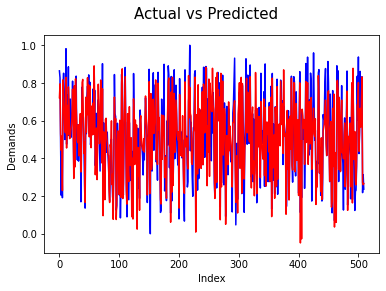

In [151]:
# Actual vs Predicted

c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train, color = 'blue')
plt.plot(c, y_train_pred, color = 'red')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result follow almost same pattern, so this model is good

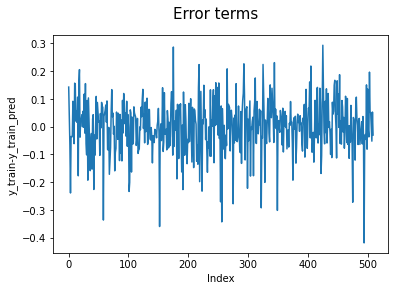

In [152]:
# Error Terms

c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train-y_train_pred)
plt.suptitle('Error terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Error terms are independent of each other

In [153]:
# Checking the R_squared value
r2 = r2_score(y_train, y_train_pred)
round(r2,4)

0.8146

### Linearity 

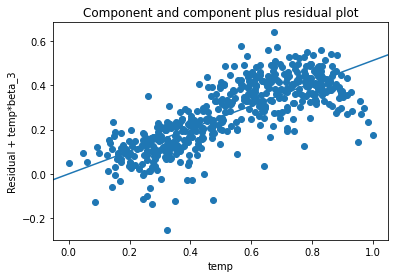

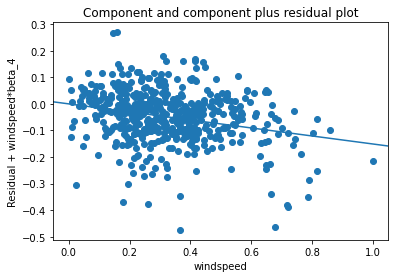

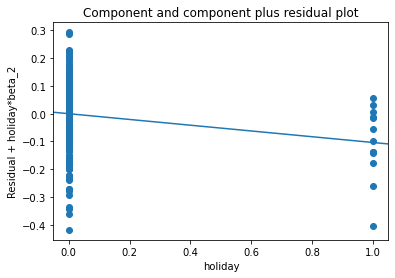

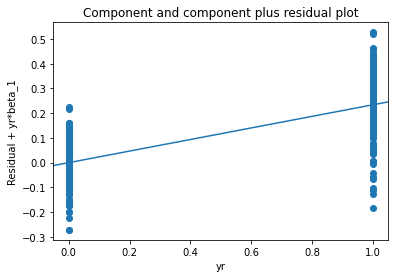

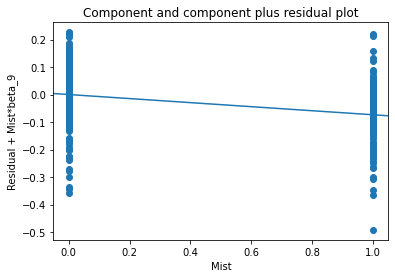

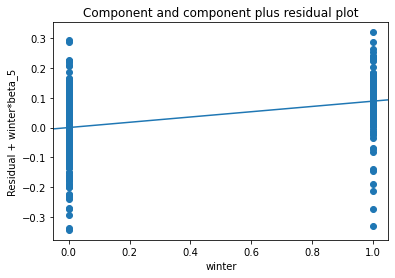

In [154]:
# Let's check for Linearity

sm.graphics.plot_ccpr(lm_6, 'temp')
plt.show()
sm.graphics.plot_ccpr(lm_6, 'windspeed')
plt.show()
sm.graphics.plot_ccpr(lm_6, 'holiday')
plt.show()
sm.graphics.plot_ccpr(lm_6, 'yr')
plt.show()
sm.graphics.plot_ccpr(lm_6, 'Mist')
plt.show()
sm.graphics.plot_ccpr(lm_6, 'winter')
plt.show()

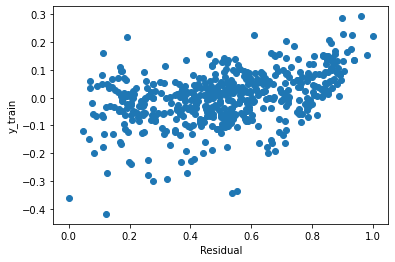

In [155]:
Y_train_pred = lm_6.predict(X_train_lm6)
residual = y_train-y_train_pred
plt.scatter(y_train, residual)
plt.xlabel('Residual')
plt.ylabel('y_train')
plt.show()

We can see Linearity from the above plots

### Homoscedasiticity 

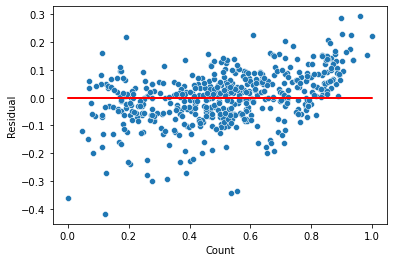

In [156]:
Y_train_pred = lm_6.predict(X_train_lm6)
residual = y_train-y_train_pred
sns.scatterplot(y_train, residual)
plt.plot(y_train,(y_train-y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Residuals showing no visible pattern

# Step 8: Making Predictions

### Let's make predictions using our final model

#### Applying Scaling on the test sets 

In [157]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [158]:
# Checking it's numerical aspects

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [159]:
y_test = df_test.pop('cnt')
X_test = df_test

In [160]:
cols = X_train_new.columns
X_test = X_test[cols]
X_test_lm_6 = sm.add_constant(X_test)

In [161]:
y_pred = lm_6.predict(X_test_lm_6)

In [162]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7688

# Step 9: Model Evaluation

Let's now plot the graph for Actual vs Predicted Values

Text(0, 0.5, 'y_pred')

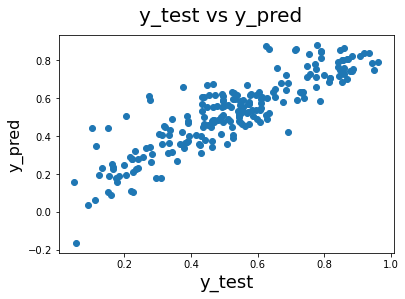

In [163]:
# Plotting y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [164]:
# Checking the parameters

round(lm_6.params,4)

const         0.1830
yr            0.2342
holiday      -0.1037
temp          0.5126
windspeed    -0.1510
winter        0.0884
jan          -0.0797
sep           0.0749
Light_snow   -0.2869
Mist         -0.0736
dtype: float64

#### Equation of best fitted line 

*cnt = 0.1830 + 0.2342 x yr - 0.1037 x holiday + 0.5126 x temp - 0.1510 x windspeed + 0.0884 x winter - 0.0797 x jan + 0.0749 x sep - 0.2869 x Light_snow - 0.0736 x Mist*

#### Adjusted-R^2 value

In [165]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7589


### Plotting the Regression Plot

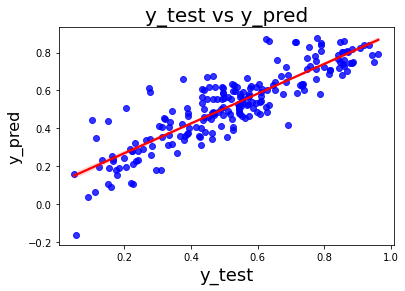

In [166]:
plt.figure()
sns.regplot(x = y_test, y = y_pred, ci=68, fit_reg = True, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

## Comparison between the Training and Testing datasets

* Train datset R-squared = 0.815
* Test datset R-squared = 0.768
* Train dataset adjusted R-squared = 0.811
* Test dataset adjusted R-squared = 0.758

# Conclusion:

Demand of the bikes depends on the following variables:
* yr
* holiday
* temp
* windspeed
* winter
* jan
* sep
* Light_snow
* Mist 

## Recommendations: 

* There would be less bookings during light snow so, the company can use this weather to repair or service their         bikes.
* The company should be well prepared because there would be a high demand once the pandemic situation gets back to     the normal.
* In order to attract more demand on holidays, the company should consider for giving discount offers on holidays.